In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [5]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [6]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [7]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
776428,Trip to the Moon,Little Timmy's Playlist,['ReptileLegit'],0.889,0.3900,0.75700,0.000002,0.0922,0.575,0.380,81.020,87353,2019
1142684,"Preludes, Op. 34: VI. Allegretto in B Minor",Mussorgsky: Pictures At an Exhibition - Shosta...,"['Dmitri Shostakovich', 'Katya Apekisheva']",0.541,0.0498,0.98700,0.843000,0.0800,0.384,0.172,111.492,72600,2012
1042855,Young Og,Lost in Paradise,['B Free'],0.678,0.0458,0.12000,0.000000,0.2290,0.537,0.807,101.991,244647,2019
84592,I Refuse,Leap of Faith,['Timothy B. Schmit'],0.798,0.0290,0.01560,0.003860,0.0912,0.766,0.518,116.000,407787,2016
997619,Nova Scotia,Open Fields,['Hadar Noiberg'],0.491,0.0360,0.97200,0.782000,0.0921,0.263,0.347,102.122,404755,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796075,Estrellita del Sur,RCA 100 Años de Música - Segunda Parte (Grande...,['La Panchita'],0.589,0.1440,0.85100,0.000000,0.1060,0.806,0.230,162.877,182267,2002
747140,Shuckin' the Brush,Figures of the Year,['The Barefoot Movement'],0.405,0.0328,0.74800,0.883000,0.1090,0.880,0.623,136.372,136413,2013
366123,Park - Obvious,Pacific Ridge Records Heroes of Pop Punk,['Park'],0.327,0.0554,0.00027,0.012500,0.3310,0.166,0.708,84.288,168800,2006
815212,Just a Phase,Step Up,['Diazpora'],0.927,0.0474,0.07540,0.075800,0.1810,0.963,0.489,114.801,217093,2014


In [8]:
sampled_data["Energy"].max()

1.0

In [9]:
sampled_data["Energy"].min()

0.0

In [10]:
energy_bins = [0, .2, .4, .6, .8, 1]
energy_groupings = ["Energy <=.2", "Energy .2-.4", "Energy .4-.6", "Energy .6-.8", "Energy .8-1"]
sampled_data["Energy"] = pd.cut(sampled_data["Energy"], energy_bins, labels=energy_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
776428,Trip to the Moon,Little Timmy's Playlist,['ReptileLegit'],0.889,0.3900,0.75700,0.000002,0.0922,0.575,Energy .2-.4,81.020,87353,2019
1142684,"Preludes, Op. 34: VI. Allegretto in B Minor",Mussorgsky: Pictures At an Exhibition - Shosta...,"['Dmitri Shostakovich', 'Katya Apekisheva']",0.541,0.0498,0.98700,0.843000,0.0800,0.384,Energy <=.2,111.492,72600,2012
1042855,Young Og,Lost in Paradise,['B Free'],0.678,0.0458,0.12000,0.000000,0.2290,0.537,Energy .8-1,101.991,244647,2019
84592,I Refuse,Leap of Faith,['Timothy B. Schmit'],0.798,0.0290,0.01560,0.003860,0.0912,0.766,Energy .4-.6,116.000,407787,2016
997619,Nova Scotia,Open Fields,['Hadar Noiberg'],0.491,0.0360,0.97200,0.782000,0.0921,0.263,Energy .2-.4,102.122,404755,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796075,Estrellita del Sur,RCA 100 Años de Música - Segunda Parte (Grande...,['La Panchita'],0.589,0.1440,0.85100,0.000000,0.1060,0.806,Energy .2-.4,162.877,182267,2002
747140,Shuckin' the Brush,Figures of the Year,['The Barefoot Movement'],0.405,0.0328,0.74800,0.883000,0.1090,0.880,Energy .6-.8,136.372,136413,2013
366123,Park - Obvious,Pacific Ridge Records Heroes of Pop Punk,['Park'],0.327,0.0554,0.00027,0.012500,0.3310,0.166,Energy .6-.8,84.288,168800,2006
815212,Just a Phase,Step Up,['Diazpora'],0.927,0.0474,0.07540,0.075800,0.1810,0.963,Energy .4-.6,114.801,217093,2014


In [11]:
#getting count of each category and converting to percentage for pie chart
energy_lessthan_point2 = ((sampled_data.loc[sampled_data["Energy"]=='Energy <=.2'].count())/12040)*100
energy_lessthan_point2

Song Title          20.348837
Album Title         20.348837
Artists             20.348837
Danceability        20.348837
Speechiness         20.348837
Acousticness        20.348837
Instrumentalness    20.348837
Liveness            20.348837
Valence             20.348837
Energy              20.348837
Tempo               20.348837
Duration(ms)        20.348837
Release Year        20.348837
dtype: float64

In [12]:
energy_point2topoint4 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .2-.4'].count())/12040)*100
energy_point2topoint4

Song Title          17.607973
Album Title         17.607973
Artists             17.607973
Danceability        17.607973
Speechiness         17.607973
Acousticness        17.607973
Instrumentalness    17.607973
Liveness            17.607973
Valence             17.607973
Energy              17.607973
Tempo               17.607973
Duration(ms)        17.607973
Release Year        17.607973
dtype: float64

In [13]:
energy_point4topoint6 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .4-.6'].count())/12040)*100
energy_point4topoint6

Song Title          20.066445
Album Title         20.066445
Artists             20.066445
Danceability        20.066445
Speechiness         20.066445
Acousticness        20.066445
Instrumentalness    20.066445
Liveness            20.066445
Valence             20.066445
Energy              20.066445
Tempo               20.066445
Duration(ms)        20.066445
Release Year        20.066445
dtype: float64

In [14]:
energy_point6topoint8 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .6-.8'].count())/12040)*100
energy_point6topoint8

Song Title          20.631229
Album Title         20.631229
Artists             20.631229
Danceability        20.631229
Speechiness         20.631229
Acousticness        20.631229
Instrumentalness    20.631229
Liveness            20.631229
Valence             20.631229
Energy              20.631229
Tempo               20.631229
Duration(ms)        20.631229
Release Year        20.631229
dtype: float64

In [15]:
energy_point8to1 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .8-1'].count())/12040)*100
energy_point8to1

Song Title          21.345515
Album Title         21.345515
Artists             21.345515
Danceability        21.345515
Speechiness         21.345515
Acousticness        21.345515
Instrumentalness    21.345515
Liveness            21.345515
Valence             21.345515
Energy              21.345515
Tempo               21.345515
Duration(ms)        21.345515
Release Year        21.345515
dtype: float64

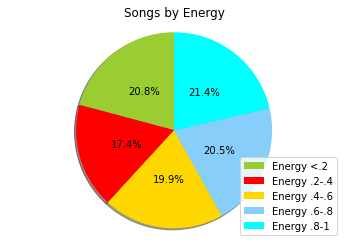

In [16]:
#pie chart
labels = ["Energy <.2", "Energy .2-.4", "Energy .4-.6", "Energy .6-.8", "Energy .8-1"]
sizes = [20.830565, 17.350498, 19.883721, 20.539867, 21.395349]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral','blue','pink', 'darkgreen', 
          'yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, shadow=True, startangle=90, radius=1.2)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%' )
plt.title("Songs by Energy")
plt.legend(patches, labels, loc="lower right")
ax1.axis('equal')
plt.savefig("Images/energy-pie.png")
plt.show()

In [24]:
sampled_data_by_mean_energy = renamed_track_data_columns.groupby(["Artists"]).mean()["Energy"]
sampled_data_by_mean_danceability = renamed_track_data_columns.groupby(["Artists"]).mean()["Danceability"]
sampled_data_by_mean_speechiness = renamed_track_data_columns.groupby(["Artists"]).mean()["Speechiness"]
sampled_data_by_mean_acousticness = renamed_track_data_columns.groupby(["Artists"]).mean()["Acousticness"]
sampled_data_by_mean_instrumentalness = renamed_track_data_columns.groupby(["Artists"]).mean()["Instrumentalness"]
sampled_data_by_mean_liveness = renamed_track_data_columns.groupby(["Artists"]).mean()["Liveness"]
sampled_data_by_mean_valence = renamed_track_data_columns.groupby(["Artists"]).mean()["Valence"]
sampled_data_by_mean_tempo = renamed_track_data_columns.groupby(["Artists"]).mean()["Tempo"]
count_of_song_per_artist = renamed_track_data_columns["Artists"].value_counts()
count_of_song_per_artist

['Various Artists']                              1753
['Vitamin String Quartet']                       1577
['Aretha Franklin']                              1209
['The City of Prague Philharmonic Orchestra']    1042
["Dan Gibson's Solitudes"]                        997
                                                 ... 
['Johnny "Big Moose" Walker']                       1
['Leo Brouwer', 'Eren Süalp']                       1
['Thurisaz', 'Woods Of Ypres']                      1
['Heart', 'Richard Marx']                           1
['Isamar &amp; Compania']                           1
Name: Artists, Length: 165365, dtype: int64

In [25]:
summary_by_artist = pd.DataFrame({"Mean Energy": sampled_data_by_mean_energy,
                                 "Mean Danceability": sampled_data_by_mean_danceability,
                                 "Mean Speechiness": sampled_data_by_mean_speechiness,
                                 "Mean Acousticness": sampled_data_by_mean_acousticness,
                                 "Mean Insturmentalness": sampled_data_by_mean_instrumentalness,
                                 "Mean Liveness": sampled_data_by_mean_liveness,
                                 "Mean Valence": sampled_data_by_mean_valence,
                                 "Mean Tempo": sampled_data_by_mean_tempo,
                                 "Number of Songs": count_of_song_per_artist})
summary_by_artist.head()

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
"[""'63 Burnout""]",0.869500,0.277857,0.068479,0.091950,0.809429,0.244679,0.580643,150.376714,14
"[""'68""]",0.799786,0.379143,0.101486,0.066451,0.215516,0.254450,0.331764,124.522643,14
"[""'89 Skratch Gangstaz (DJ Pone & Snayk Eyez)""]",0.902000,0.632000,0.452000,0.230000,0.000353,0.709000,0.577000,92.729000,1
"[""'Ale'a"", 'Ryan Gonzalez']",0.544000,0.378000,0.065300,0.263000,0.907000,0.116000,0.312000,156.956000,1
"[""'Boodle It' Wiggins""]",0.320000,0.590000,0.032700,0.992000,0.005040,0.111000,0.440000,95.263000,1


In [37]:
summary_by_artist_over_10_songs = summary_by_artist[(summary_by_artist["Number of Songs"] > 10)]
summary_by_artist_over_10_songs.head()

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
"[""'63 Burnout""]",0.869500,0.277857,0.068479,0.091950,0.809429,0.244679,0.580643,150.376714,14
"[""'68""]",0.799786,0.379143,0.101486,0.066451,0.215516,0.254450,0.331764,124.522643,14
"[""'Til Tuesday""]",0.557450,0.539375,0.031038,0.262896,0.015520,0.153585,0.574575,125.518750,40
"[""'Wild' Bill Davison""]",0.341792,0.443458,0.034238,0.889417,0.808758,0.191854,0.492750,98.561208,24
"[""10 'til 11""]",0.709583,0.584583,0.133200,0.080488,0.052092,0.183000,0.613583,113.487417,12


In [38]:
top_ten_energy = summary_by_artist_over_10_songs.sort_values(["Mean Energy"], ascending=False)
top_ten_energy.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
['Chainbreaker'],0.997167,0.330250,0.153258,0.000019,8.500373e-03,0.270000,0.203908,149.980417,12
['Hellripper'],0.996500,0.265667,0.186917,0.000782,9.534606e-02,0.208758,0.116850,153.259583,12
['Living the Panic'],0.994727,0.409091,0.176455,0.000054,4.941191e-01,0.302273,0.089182,126.711273,11
['Cretin'],0.993786,0.258857,0.150657,0.000274,2.926850e-01,0.223371,0.077129,98.318571,14
['Bludgeon'],0.992545,0.301182,0.128418,0.000586,6.499091e-01,0.193845,0.326609,130.789455,11
['Dicky B. Hardy'],0.992417,0.304167,0.206250,0.093583,9.283333e-07,0.238167,0.184717,150.245500,12
['The Vacancies'],0.992333,0.314333,0.147487,0.064247,0.000000e+00,0.297667,0.397333,128.247200,15
['Battlecross'],0.992091,0.477909,0.105582,0.000683,2.500818e-01,0.218936,0.160536,121.166727,11
['Krum Bums'],0.992000,0.297308,0.151869,0.000028,6.337692e-01,0.230138,0.481615,140.112769,13
['The Dirtys'],0.991200,0.236053,0.124127,0.116280,3.894480e-01,0.461667,0.132453,119.524200,15


In [39]:
top_ten_danceability = summary_by_artist_over_10_songs.sort_values(["Mean Danceability"], ascending=False)
top_ten_danceability.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
"['Monchy & Alexandra', 'Alexandra']",0.624917,0.929167,0.043992,0.131167,0.002838,0.086608,0.868417,125.038250,12
['M.C. Shy-D'],0.678529,0.922529,0.233588,0.034748,0.003298,0.112929,0.670824,119.605824,17
['De-U Records'],0.485900,0.901000,0.304465,0.032749,0.015515,0.088270,0.582050,113.893150,20
['Key Glock'],0.628597,0.893723,0.274825,0.054340,0.001032,0.133212,0.492209,136.483933,119
['ill Imperial'],0.674643,0.891000,0.264071,0.449071,0.000026,0.248814,0.590500,105.416643,14
['Monchy & Alexandra'],0.672394,0.889333,0.044027,0.277600,0.000237,0.124058,0.884364,128.811424,33
['DJ Red'],0.265273,0.889000,0.211773,0.051509,0.304842,0.196191,0.300436,123.438909,11
['Rhythm & Sound'],0.229992,0.888833,0.246583,0.492167,0.327926,0.138292,0.463083,126.009583,12
['Olly Anna'],0.775182,0.888455,0.160727,0.094468,0.009684,0.117664,0.689727,112.790364,11
['Zacarias Ferreira'],0.579600,0.887600,0.043420,0.409300,0.001965,0.111000,0.895467,131.228200,15


In [40]:
top_ten_speechiness = summary_by_artist_over_10_songs.sort_values(["Mean Speechiness"], ascending=False)
top_ten_speechiness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
"[""Martin O'Malley""]",0.396727,0.611727,0.957000,0.901000,0.000000e+00,0.377364,0.668091,86.253545,11
['Diabetes Prevention Society'],0.175722,0.697444,0.952944,0.497556,0.000000e+00,0.231278,0.583500,98.896833,18
['Scharpling & Wurster'],0.452190,0.655333,0.949095,0.963333,3.752381e-07,0.276710,0.424762,90.132762,21
['Michel Gondry'],0.223667,0.681800,0.948933,0.753267,0.000000e+00,0.261600,0.463867,94.663000,15
['Frank Caliendo'],0.614105,0.616316,0.948895,0.653579,2.905272e-02,0.676211,0.470579,88.236263,19
['Vandana Shiva'],0.341118,0.679824,0.948471,0.766941,0.000000e+00,0.268565,0.296294,95.218235,17
['Robin Williams'],0.849500,0.566937,0.948188,0.862438,0.000000e+00,0.818063,0.181869,92.151125,16
['Russell Peters'],0.671500,0.571333,0.947111,0.810056,8.055556e-07,0.724556,0.228211,93.230278,18
['William Wheaton'],0.208636,0.654364,0.946909,0.492091,0.000000e+00,0.112636,0.305364,119.165818,11
['Ellen Cleghorne'],0.401929,0.635214,0.945929,0.847500,1.614286e-07,0.662714,0.415429,105.701357,14


In [41]:
top_ten_acousticness = summary_by_artist_over_10_songs.sort_values(["Mean Acousticness"], ascending=False)
top_ten_acousticness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
['Mamie Smith & Her Jazz Hounds'],0.224000,0.540059,0.051024,0.995824,0.272137,0.335706,0.626471,106.019059,17
['American Horn Quartet'],0.043471,0.331767,0.043783,0.995667,0.930333,0.118117,0.196117,103.196833,12
"['Giovanni Maria da Crema', 'Christopher Wilson']",0.025748,0.478400,0.050947,0.995600,0.908867,0.111887,0.637467,109.177267,15
"[""Marco Dall'Aquila"", 'Christopher Wilson']",0.028312,0.419824,0.052959,0.995588,0.924647,0.098671,0.586588,103.477706,17
['The Blacklight Bassoon Ensemble'],0.086177,0.309608,0.066133,0.995417,0.933667,0.140258,0.206458,100.561167,12
"[""Clarence Williams' Blue Five""]",0.302692,0.573308,0.068969,0.995385,0.489923,0.286615,0.657769,117.440385,13
"['Robert Schumann', 'Idil Biret']",0.063632,0.389538,0.061185,0.995385,0.897923,0.117492,0.401308,103.719385,13
"['Wolfgang Amadeus Mozart', 'Scottish Chamber Orchestra Wind Soloists']",0.045347,0.458269,0.048408,0.995346,0.808808,0.120388,0.437077,118.369808,26
"['John Johnson', 'Christopher Wilson']",0.032325,0.465437,0.050538,0.995312,0.889625,0.108900,0.478875,103.315000,16
"['Georg Philipp Telemann', 'Mindy Rosenfeld', 'Stephen Schultz', 'American Baroque']",0.011662,0.428667,0.064763,0.995292,0.795667,0.101004,0.685542,114.067000,24


In [42]:
top_ten_instrumentalness = summary_by_artist_over_10_songs.sort_values(["Mean Insturmentalness"], ascending=False)
top_ten_instrumentalness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
['Alan Kaplan'],0.147833,0.142627,0.037180,0.969400,0.963667,0.123887,0.065767,74.240000,15
['Across The Pond'],0.742000,0.530615,0.042685,0.806000,0.960923,0.241662,0.927846,107.499923,13
"['Steve Brown', 'Ulf Bandgren']",0.045182,0.504636,0.062555,0.995091,0.960273,0.105982,0.403727,105.487364,11
['Eric Weissberg'],0.653150,0.361150,0.037510,0.198203,0.960100,0.199740,0.906600,142.859000,20
['Dr. Wily & The Robot Masters'],0.669733,0.264800,0.045007,0.000024,0.957333,0.179660,0.426133,103.065067,15
['Michael Levy'],0.179424,0.535172,0.110314,0.984483,0.954000,0.104469,0.163048,89.290552,29
['Roger Evernden'],0.043996,0.425304,0.089289,0.989696,0.949761,0.108557,0.281020,101.012957,46
"['Matt Christensen', 'John Reeves']",0.017404,0.465667,0.064317,0.994000,0.949667,0.094083,0.080156,101.852944,18
"['Philip Glass', 'Matt Haimovitz']",0.063244,0.215144,0.049819,0.889312,0.948625,0.109994,0.198306,103.120313,16
['The Lovely Moon'],0.196635,0.258050,0.042431,0.793688,0.947688,0.177113,0.062225,103.146813,16


In [43]:
top_ten_liveness = summary_by_artist_over_10_songs.sort_values(["Mean Liveness"], ascending=False)
top_ten_liveness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
['The Barvarian Beesingers'],0.582571,0.473000,0.061900,0.574571,2.953339e-01,0.960857,0.674929,139.319786,14
"[""Gilles Vigneault et Les Charbonniers de l'Enfer""]",0.588692,0.598538,0.335546,0.678769,3.084923e-05,0.960231,0.637308,118.989692,13
['Barbara Morrison'],0.658714,0.545000,0.119607,0.377929,2.003921e-04,0.938286,0.672929,123.101000,14
['Louis Prima with Sam Butera and the Witnesses'],0.673583,0.489500,0.258067,0.690500,1.975399e-01,0.937333,0.681917,117.979750,12
['Drew Hastings'],0.826818,0.502364,0.867364,0.705182,5.381818e-07,0.928273,0.379000,110.939273,11
['Tom Principato Band'],0.814455,0.409273,0.191300,0.131464,9.462780e-02,0.926364,0.480727,148.096273,11
"['Alter Bridge', 'The Parallax Orchestra']",0.885048,0.258490,0.074986,0.033401,8.505286e-02,0.924762,0.208781,123.363714,21
['Donna Hopkins Band'],0.653545,0.421364,0.074736,0.226364,1.565945e-04,0.924636,0.438091,130.098273,11
"['Hombres G', 'Los Enanitos Verdes']",0.838913,0.453043,0.079578,0.089473,4.956555e-03,0.920261,0.380891,131.076957,23
['The Knobs'],0.833529,0.364706,0.313282,0.394606,1.420161e-01,0.914529,0.474388,123.999000,17


In [44]:
top_ten_valence = summary_by_artist_over_10_songs.sort_values(["Mean Valence"], ascending=False)
top_ten_valence.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
['Harry Bradley'],0.333267,0.630000,0.063640,0.929133,0.891000,0.144953,0.990867,114.462000,15
"[""Paddy O'Brien, Tom Schaefer & Paul Wehling""]",0.603286,0.653500,0.066264,0.947500,0.517571,0.208500,0.988643,113.304571,14
['Cuhamileros de la sierra de Xichu'],0.888583,0.810861,0.049689,0.285115,0.549429,0.229897,0.973500,130.376333,36
['Mórga'],0.590250,0.530083,0.052925,0.811833,0.692967,0.106542,0.971417,126.520917,12
['NicGaviskey'],0.410533,0.578133,0.067667,0.970600,0.699188,0.146340,0.970600,111.755200,15
"[""Paddy O'Brien""]",0.420000,0.584875,0.072669,0.706875,0.001535,0.248969,0.970562,107.952813,16
"['Andy McGann', 'Paul Brady']",0.527000,0.599167,0.063458,0.964000,0.507483,0.243900,0.967583,109.698000,12
['Jean Carnigan'],0.789687,0.584688,0.044712,0.747437,0.776688,0.248013,0.965750,129.190250,16
"['Ivan Villazon', 'Saul Lallemand']",0.672966,0.764034,0.084662,0.509759,0.000192,0.092169,0.963414,118.793414,29
['Raymond Fairchild King Of The Smoky Mountain Banjo Players'],0.794840,0.470440,0.038610,0.538120,0.921880,0.277998,0.962380,142.633660,50


In [45]:
top_ten_tempo = summary_by_artist_over_10_songs.sort_values(["Mean Tempo"], ascending=False)
top_ten_tempo.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo,Number of Songs
"['Steven Halpern', 'The Sound Medicine Band', 'Chief Sonne Reyna']",0.269417,0.483250,0.061300,0.368975,0.929333,0.082608,0.128633,174.490250,12
['Logistics'],0.953444,0.485444,0.068444,0.000326,0.840056,0.243644,0.453694,173.733944,18
['Des McMahon'],0.941077,0.515615,0.099208,0.007441,0.745308,0.133008,0.154746,173.542308,13
['Micromakine'],0.981636,0.428636,0.361000,0.008201,0.580038,0.221627,0.193545,171.295909,11
['Q-Project'],0.939833,0.518167,0.071406,0.003964,0.477819,0.446861,0.551944,171.119444,18
['Los Humildes'],0.482640,0.620680,0.070280,0.564880,0.000011,0.148468,0.809480,170.838720,25
['Dose'],0.896059,0.567588,0.117594,0.002879,0.543692,0.271929,0.444176,170.533588,17
['Danny Byrd'],0.893154,0.477000,0.081446,0.021416,0.388662,0.230146,0.453169,170.527846,13
['Black Sun Empire'],0.931384,0.541479,0.103321,0.012725,0.780964,0.200711,0.268396,170.470247,73
"[""Chris Ardoin & Double Clutchin'""]",0.836615,0.616923,0.043423,0.047114,0.003127,0.115062,0.945462,168.774923,13
